In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns
from Bio import SeqIO
from Bio.Seq import *
import os

## Making gene_df that contains gene lengths for rpkm caluclation

In [2]:
infile = SeqIO.read('/home/m/genome_files/REF-seq_CLJU.gbk','gb')
genes =[]
name = []
product = []
func = []
strand = []
start = []
stop = []
aaseq = []
cds_seq = []

    #genome_seq_df = pd.DataFrame({'sequence':list(str(infile.seq))},index=range(1,len(str(infile.seq))+1))
for feature in infile.features:
    if feature.type == 'CDS' or feature.type == 'rRNA' or feature.type == 'tRNA':  #Only cares for coding sequences which are not pseudogenes
        genes.append(feature.qualifiers['locus_tag'][0])
        try: name.append(feature.qualifiers['gene'][0])
        except: name.append('')
        product.append(feature.qualifiers['product'][0])
        cds_seq.append(feature.location.extract(infile.seq).tostring())
        if 'function' in feature.qualifiers:                       #not all genes have known functions
            func.append(feature.qualifiers['function'][0])
        else:
            func.append("N/A")
        try:
            aaseq.append(feature.qualifiers['translation'][0])
        except:
            aaseq.append("N/A")
        if feature.strand == 1:
            strand.append("plus")
            start.append(feature.location.start.real+1)
            stop.append(feature.location.end.real)
        elif feature.strand == -1:
            strand.append("minus")
            start.append(feature.location.start.real+1)
            stop.append(feature.location.end.real)
gene_df = pd.DataFrame({"gene_id": genes, "name": name, "product": product, "function": func, "strand": strand, "start": start, "stop": stop, "cds_seq":cds_seq,"aaseq": aaseq},
                          columns = ["gene_id", "name", "function", "product", "strand", "start", "stop", "cds_seq","aaseq"])

/home/m/anaconda2/lib/python2.7/site-packages/Bio/Seq.py:341: BiopythonDeprecationWarning: This method is obsolete; please use str(my_seq) instead of my_seq.tostring().
  BiopythonDeprecationWarning)


# Importing ribo and RNA-seq data and merging into one dataframe

In [3]:
ribodf = pd.read_csv('./data_analysis/results_12_21_2016/table_counts_RIBOseq_new_annotation.txt')
rnadf = pd.read_csv('./data_analysis/results_12_21_2016/table_counts_RNAseq_new_annotation.txt')
df=pd.merge(ribodf, rnadf)

# merging with gene dataframe

In [4]:
df = pd.merge(df,gene_df)
df['gene_length']=df.stop-df.start + 1

# Calculating RPKM values for RNA-seq and Ribo-seq and adding into dataframe

In [5]:
df['ribo_rpkm_co1']=(df.co1 * 1000000000)/(df.co1.sum()*df.gene_length)
df['ribo_rpkm_co2']=(df.co2 * 1000000000)/(df.co2.sum()*df.gene_length)
df['ribo_rpkm_hf1']=(df.hf1 * 1000000000)/(df.hf1.sum()*df.gene_length)
df['ribo_rpkm_hf2']=(df.hf2 * 1000000000)/(df.hf2.sum()*df.gene_length)
df['ribo_rpkm_h2c1']=(df['h2co2.1'] * 1000000000)/(df['h2co2.1'].sum()*df.gene_length)
df['ribo_rpkm_h2c2']=(df['h2co2.2'] * 1000000000)/(df['h2co2.2'].sum()*df.gene_length)
df['rna_rpkm_co1']=(df.co1rn *1000000000)/(df.co1rn.sum()*df.gene_length)
df['rna_rpkm_co2']=(df.co2rn *1000000000)/(df.co2rn.sum()*df.gene_length)
df['rna_rpkm_hf1']=(df.hf1rn *1000000000)/(df.hf1rn.sum()*df.gene_length)
df['rna_rpkm_hf2']=(df.hf2rn *1000000000)/(df.hf2rn.sum()*df.gene_length)
df['rna_rpkm_h2c1']=(df['h2co2.1rn'] *1000000000)/(df['h2co2.1rn'].sum()*df.gene_length)
df['rna_rpkm_h2c2']=(df['h2co2.2rn'] *1000000000)/(df['h2co2.2rn'].sum()*df.gene_length)
#taking averages
df['av_ribo_rpkm_co']=(df.ribo_rpkm_co1+df.ribo_rpkm_co2) /2.
df['av_ribo_rpkm_hf']=(df.ribo_rpkm_hf1+df.ribo_rpkm_hf2) /2.
df['av_ribo_rpkm_h2c']=(df.ribo_rpkm_h2c1+df.ribo_rpkm_h2c2) /2.
df['av_rna_rpkm_co']=(df.rna_rpkm_co1+df.rna_rpkm_co2) / 2.
df['av_rna_rpkm_hf']=(df.rna_rpkm_hf1+df.rna_rpkm_hf2) / 2. 
df['av_rna_rpkm_h2c']= (df.rna_rpkm_h2c1+df.rna_rpkm_h2c2) /2.

# Calculating translational efficiency

In [6]:
df.columns.values

array(['gene_id', 'co1', 'co2', 'hf1', 'hf2', 'h2co2.1', 'h2co2.2',
       'co1rn', 'co2rn', 'hf1rn', 'hf2rn', 'h2co2.1rn', 'h2co2.2rn',
       'name', 'function', 'product', 'strand', 'start', 'stop', 'cds_seq',
       'aaseq', 'gene_length', 'ribo_rpkm_co1', 'ribo_rpkm_co2',
       'ribo_rpkm_hf1', 'ribo_rpkm_hf2', 'ribo_rpkm_h2c1',
       'ribo_rpkm_h2c2', 'rna_rpkm_co1', 'rna_rpkm_co2', 'rna_rpkm_hf1',
       'rna_rpkm_hf2', 'rna_rpkm_h2c1', 'rna_rpkm_h2c2', 'av_ribo_rpkm_co',
       'av_ribo_rpkm_hf', 'av_ribo_rpkm_h2c', 'av_rna_rpkm_co',
       'av_rna_rpkm_hf', 'av_rna_rpkm_h2c'], dtype=object)

In [7]:
dfco = df[['gene_id', 'av_ribo_rpkm_co','av_rna_rpkm_co' ]]
dfhf = df[['gene_id', 'av_ribo_rpkm_hf','av_rna_rpkm_hf' ]]
dfh2c= df[['gene_id', 'av_ribo_rpkm_h2c','av_rna_rpkm_h2c' ]]
dfco=dfco[dfco.av_rna_rpkm_co>10] 
dfhf=dfhf[dfhf.av_rna_rpkm_hf>10] 
dfh2c=dfh2c[dfh2c.av_rna_rpkm_h2c>10]
dfco['co_te']=dfco.av_ribo_rpkm_co /dfco.av_rna_rpkm_co
dfhf['hf_te']=dfhf.av_ribo_rpkm_hf /dfhf.av_rna_rpkm_hf
dfh2c['h2c_te']=dfh2c.av_ribo_rpkm_h2c/ dfh2c.av_rna_rpkm_h2c

In [8]:
co_te_80_percentile= dfco[dfco.co_te >= np.percentile(dfco.co_te, 80)]
co_te_80_percentile.columns = co_te_80_percentile.columns.str.replace('co_te','hi_co_te')
co_te_80_percentile.columns = co_te_80_percentile.columns.str.replace('av_ribo_rpkm_co','hiav_ribo_rpkm_co') 
co_te_80_percentile.columns = co_te_80_percentile.columns.str.replace('av_rna_rpkm_co','hiav_rna_rpkm_co') 

co_te_20_percentile = dfco[dfco.co_te <= np.percentile(dfco.co_te, 20)]
co_te_20_percentile.columns = co_te_20_percentile.columns.str.replace('co_te','low_co_te') 
co_te_20_percentile.columns = co_te_20_percentile.columns.str.replace('av_ribo_rpkm_co','loav_ribo_rpkm_co')
co_te_20_percentile.columns = co_te_20_percentile.columns.str.replace('av_rna_rpkm_co','loav_rna_rpkm_co')


hf_te_80_percentile = dfhf[dfhf.hf_te >= np.percentile(dfhf.hf_te, 80)]
hf_te_80_percentile.columns = hf_te_80_percentile.columns.str.replace('hf_te','hi_hf_te')
hf_te_80_percentile.columns = hf_te_80_percentile.columns.str.replace('av_ribo_rpkm_hf','hiav_ribo_rpkm_hf') 
hf_te_80_percentile.columns = hf_te_80_percentile.columns.str.replace('av_rna_rpkm_hf','hiav_rna_rpkm_hf') 

hf_te_20_percentile = dfhf[(dfhf.hf_te <= np.percentile(dfhf.hf_te, 20))]
hf_te_20_percentile.columns = hf_te_20_percentile.columns.str.replace('hf_te','low_hf_te') 
hf_te_20_percentile.columns = hf_te_20_percentile.columns.str.replace('av_ribo_rpkm_hf','loav_ribo_rpkm_hf') 
hf_te_20_percentile.columns = hf_te_20_percentile.columns.str.replace('av_rna_rpkm_hf','loav_rna_rpkm_hf') 

h2c_te_80_percentile= dfh2c[dfh2c.h2c_te >= np.percentile(dfh2c.h2c_te,80)]
h2c_te_80_percentile.columns = h2c_te_80_percentile.columns.str.replace('h2c_te','hi_h2c_te')
h2c_te_80_percentile.columns = h2c_te_80_percentile.columns.str.replace('av_ribo_rpkm_h2c','hiav_ribo_rpkm_h2c')
h2c_te_80_percentile.columns = h2c_te_80_percentile.columns.str.replace('av_rna_rpkm_h2c','hiav_rna_rpkm_h2c')


h2c_te_20_percentile= dfh2c[dfh2c.h2c_te <= np.percentile(dfh2c.h2c_te,20)]
h2c_te_20_percentile.columns = h2c_te_20_percentile.columns.str.replace('h2c_te','low_h2c_te') 
h2c_te_20_percentile.columns = h2c_te_20_percentile.columns.str.replace('av_ribo_rpkm_h2c','loav_ribo_rpkm_h2c') 
h2c_te_20_percentile.columns = h2c_te_20_percentile.columns.str.replace('av_rna_rpkm_h2c','loav_rna_rpkm_h2c') 

co_te_80_percentile.to_csv('/home/m/Dropbox/Clostridium_paper/data_analysis/genes_high_translation_efficiency_CO_80th_percent.txt', sep='\t')
co_te_20_percentile.to_csv('/home/m/Dropbox/Clostridium_paper/data_analysis/genes_low_translation_efficiency_CO_20th_percent.txt', sep='\t')
hf_te_80_percentile.to_csv('/home/m/Dropbox/Clostridium_paper/data_analysis/genes_high_translation_efficiency_HF_80th_percent.txt',sep='\t')
hf_te_20_percentile.to_csv('/home/m/Dropbox/Clostridium_paper/data_analysis/genes_low_translation_efficiency_HF_20th_percent.txt', sep='\t')
h2c_te_80_percentile.to_csv('/home/m/Dropbox/Clostridium_paper/data_analysis/genes_high_translation_efficiency_H2C_80th_percent.txt', sep='\t')
h2c_te_20_percentile.to_csv('/home/m/Dropbox/Clostridium_paper/data_analysis/genes_low_translation_efficiency_H2C_20th_percent.txt', sep='\t')

In [9]:
colowte=pd.read_csv('/home/m/Dropbox/Clostridium_paper/data_analysis/genes_low_translation_efficiency_CO_20th_percent.txt', sep='\t')
hflowte=pd.read_csv('/home/m/Dropbox/Clostridium_paper/data_analysis/genes_low_translation_efficiency_HF_20th_percent.txt', sep='\t')
h2clowte=pd.read_csv('/home/m/Dropbox/Clostridium_paper/data_analysis/genes_low_translation_efficiency_H2C_20th_percent.txt', sep='\t')
cohite = pd.read_csv('/home/m/Dropbox/Clostridium_paper/data_analysis/genes_high_translation_efficiency_CO_80th_percent.txt', sep='\t')
hfhite= pd.read_csv('/home/m/Dropbox/Clostridium_paper/data_analysis/genes_high_translation_efficiency_HF_80th_percent.txt',sep='\t')
h2chite=pd.read_csv('/home/m/Dropbox/Clostridium_paper/data_analysis/genes_high_translation_efficiency_H2C_80th_percent.txt', sep='\t')

In [10]:
len(colowte) + len(cohite)

1252

In [11]:
cohilowcompare= pd.concat([colowte, cohite], axis=0)
hfhilowcompare= pd.concat([hflowte, hfhite], axis=0)
h2chilowcompare=pd.concat([h2clowte, h2chite], axis=0)

In [12]:
colowte[0:10]

,Unnamed: 0,gene_id,loav_ribo_rpkm_co,loav_rna_rpkm_co,low_co_te
0,0,CLJU_RS00005,30.907470,302.166750,0.102286
1,3,CLJU_RS00020,5.884056,109.500968,0.053735
2,4,CLJU_RS00025,12.337119,132.895890,0.092833
3,11,CLJU_RS00080,23.077196,280.208104,0.082357
4,24,CLJU_RS00175,1.613108,17.616491,0.091568
5,32,CLJU_RS00250,4.964704,58.270981,0.085200
6,35,CLJU_RS00265,1.095957,10.034117,0.109223
7,37,CLJU_RS00275,0.393504,10.206068,0.038556
8,45,CLJU_RS00365,11.398123,305.257370,0.037339
9,49,CLJU_RS00425,3.004304,61.331796,0.048984


In [13]:
from scipy import stats
stats.wilcoxon(x=colowte.loav_rna_rpkm_co, y=cohite.hiav_rna_rpkm_co, correction=True)

WilcoxonResult(statistic=70621.0, pvalue=1.233545524374321e-09)

In [14]:
stats.wilcoxon(x=colowte.loav_ribo_rpkm_co, y=cohite.hiav_ribo_rpkm_co, correction=True)

WilcoxonResult(statistic=5267.0, pvalue=1.6492196753401374e-93)

In [15]:
stats.wilcoxon(x=h2clowte.loav_rna_rpkm_h2c, y=h2chite.hiav_rna_rpkm_h2c, correction = True)

WilcoxonResult(statistic=80570.0, pvalue=0.12689318629692226)

In [16]:
stats.wilcoxon(x=h2clowte.loav_ribo_rpkm_h2c, y=h2chite.hiav_ribo_rpkm_h2c, correction=True)

WilcoxonResult(statistic=9296.0, pvalue=1.17026240946524e-78)

In [17]:
stats.wilcoxon(x=hflowte.loav_rna_rpkm_hf, y=hfhite.hiav_rna_rpkm_hf, correction = True)

WilcoxonResult(statistic=66194.0, pvalue=4.4114809112281982e-06)

In [18]:
stats.wilcoxon(x=hflowte.loav_ribo_rpkm_hf, y=hfhite.hiav_ribo_rpkm_hf, correction =True)

WilcoxonResult(statistic=7562.0, pvalue=8.2432707388185438e-81)

In [19]:
h2chilowcompare[0:2]

,Unnamed: 0,gene_id,hi_h2c_te,hiav_ribo_rpkm_h2c,hiav_rna_rpkm_h2c,loav_ribo_rpkm_h2c,loav_rna_rpkm_h2c,low_h2c_te
0,0,CLJU_RS00005,NaN,NaN,NaN,56.255488,446.001139,0.126133
1,3,CLJU_RS00020,NaN,NaN,NaN,5.337636,82.691535,0.064549


/home/m/anaconda2/lib/python2.7/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)
/home/m/anaconda2/lib/python2.7/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


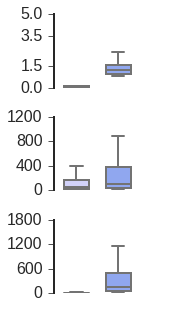

In [20]:
##ribo-seq
sns.set_style('ticks')
fig,(ax1,ax2,ax3) = plt.subplots(ncols=1,nrows=3,figsize=(1.5,5))
fig.subplots_adjust(hspace=0.4)
sns.set_context('paper', font_scale=2 )
sns.despine( offset=1)
palette=pastel=["#ccccff", "#809fff"]
ax3.spines['left'].set_linewidth(2)
ax3.spines['bottom'].set_visible(False)
ax3.set_ylim(0,1800)
ax3.set_yticks([0,600,1200,1800])
ax3.set_xlabel('')
ax3.tick_params(axis='x', colors='white')
sns.boxplot(cohilowcompare[['loav_ribo_rpkm_co', 'hiav_ribo_rpkm_co']],
            showfliers=False, width=0.6, ax=ax3,linewidth=2, palette=palette )

ax2.spines['left'].set_linewidth(2)
ax2.spines['bottom'].set_visible(False)
ax2.set_yticks([0,400,800,1200])
ax2.set_ylim(0,1200)
ax2.tick_params(axis='x', colors='white')
sns.boxplot(cohilowcompare[['loav_rna_rpkm_co', 'hiav_rna_rpkm_co']], 
            showfliers=False, width=0.6, ax=ax2, linewidth=2, palette=palette)

ax1.spines['left'].set_linewidth(2)
ax1.tick_params(axis='x', colors='white')
ax1.spines['bottom'].set_visible(False)
ax1.set_yticks([0,1.5,3.5,5])
ax1.set_ylim(0,5)
sns.boxplot(cohilowcompare[['low_co_te', 'hi_co_te']], 
            showfliers=False, width=0.6, ax=ax1, linewidth=2, palette=palette)

plt.savefig('/home/m/Dropbox/Clostridium_paper/figs/comparison between lowte and highte RNA and ribo-seq for CO_TE.pdf', bbox_inches='tight')

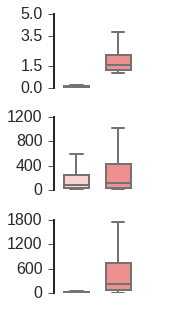

In [21]:
##ribo-seq
sns.set_style('ticks')
fig,(ax1,ax2,ax3) = plt.subplots(ncols=1,nrows=3,figsize=(1.5,5))
fig.subplots_adjust(hspace=0.4)
sns.set_context('paper', font_scale=2)
sns.despine( offset=1)
palette=pastel=[ "#ffcccc","#ff8080"]
ax3.spines['left'].set_linewidth(2)
ax3.spines['bottom'].set_visible(False)
ax3.set_ylim(0,1800)
ax3.set_yticks([0,600,1200,1800])
ax3.tick_params(axis='x', colors='white')
sns.boxplot(hfhilowcompare[['loav_ribo_rpkm_hf', 'hiav_ribo_rpkm_hf']],
            showfliers=False, width=0.6, ax=ax3,linewidth=2, palette=palette)

ax2.spines['left'].set_linewidth(2)
ax2.spines['bottom'].set_visible(False)
ax2.set_ylim(-10,1200)
ax2.set_yticks([0,400,800,1200])
ax2.tick_params(axis='x', colors='white')
sns.boxplot(hfhilowcompare[['loav_rna_rpkm_hf', 'hiav_rna_rpkm_hf']], 
            showfliers=False, width=0.6, ax=ax2, linewidth=2,palette=palette)

ax1.spines['left'].set_linewidth(2)
ax1.tick_params(axis='x', colors='white')
ax1.spines['bottom'].set_visible(False)
ax1.set_ylim(0,5)
ax1.set_yticks([0,1.5,3.5,5])
sns.boxplot(hfhilowcompare[['low_hf_te', 'hi_hf_te']], 
            showfliers=False, width=0.6, ax=ax1, linewidth=2,palette=palette)
plt.savefig('/home/m/Dropbox/Clostridium_paper/figs/comparison between lowte and highte RNA and ribo-seq for HF_TE.pdf', bbox_inches='tight')

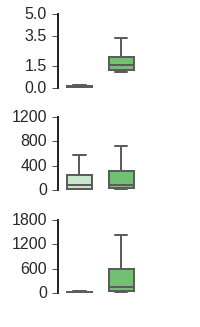

In [22]:
##ribo-seq
sns.set_style('ticks')
fig,(ax1,ax2,ax3) = plt.subplots(ncols=1,nrows=3,figsize=(1.5,5))
fig.subplots_adjust(hspace=0.4)
sns.set_context('paper', font_scale=2)
sns.despine( offset=0)
palette=pastel=["#c6ecc6", "#66cc66"]
ax3.spines['left'].set_linewidth(2)
ax3.spines['bottom'].set_visible(False)
ax3.set_ylim(-1,1800)
ax3.set_yticks([0,600,1200,1800])
ax3.tick_params(axis='x', colors='white')
sns.boxplot(h2chilowcompare[['loav_ribo_rpkm_h2c', 'hiav_ribo_rpkm_h2c']],
            showfliers=False, width=0.6, ax=ax3,linewidth=2,palette=palette)

ax2.spines['left'].set_linewidth(2)
ax2.spines['bottom'].set_visible(False)
ax2.set_ylim(0,1200)
ax2.set_yticks([0,400,800,1200])
ax2.tick_params(axis='x', colors='white')
sns.boxplot(h2chilowcompare[['loav_rna_rpkm_h2c', 'hiav_rna_rpkm_h2c']], 
            showfliers=False, width=0.6, ax=ax2, linewidth=2,palette=palette)

ax1.spines['left'].set_linewidth(2)
ax1.tick_params(axis='x', colors='white')
ax1.spines['bottom'].set_visible(False)
ax1.set_ylim(0,5)
ax1.set_yticks([0,1.5,3.5,5])
sns.boxplot(h2chilowcompare[['low_h2c_te', 'hi_h2c_te']], 
            showfliers=False, width=0.6, ax=ax1, linewidth=2,palette=palette)
plt.savefig('/home/m/Dropbox/Clostridium_paper/figs/comparison between lowte and highte RNA and ribo-seq for H2C_TE.pdf', bbox_inches='tight')

The figures above clearly biased towards high rna and ribo-seq rpkms. So comparison is not valid

# -∆G of secondary structure and effect on TE

In [23]:
secstr = pd.read_csv('/home/m/Dropbox/Clostridium_paper/secondary_structure_genes/CLJU_REF_delta_G_not_normalized.txt'\
                     , sep='\t', names=['gene_id', 'dG'])#not normalized by length
norm_secstr=pd.read_csv('/home/m/Dropbox/Clostridium_paper/secondary_structure_genes/CLJU_REF_delta_G_normalized_by_length.txt'\
                       ,sep='\t', names=['gene_id', 'dG'])
secstr=secstr.sort_values(by='gene_id')
norm_secstr=norm_secstr.sort_values(by='gene_id')

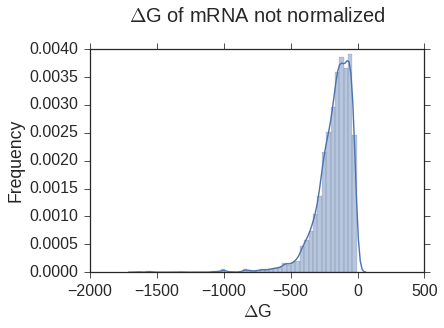

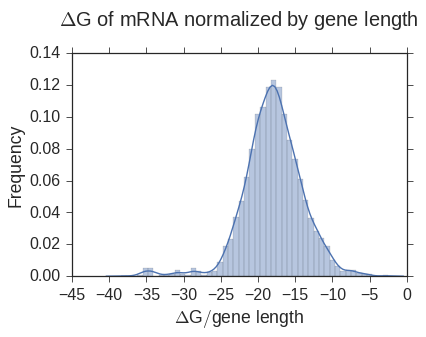

In [24]:
plt.figure(figsize=(6,4))
sns.distplot(secstr.dG, hist=True, bins= 50)
plt.title(r'$\Delta$G ' 'of mRNA not normalized\n', fontsize = 20)
plt.xlabel(r'$\Delta$G')
plt.ylabel('Frequency')

plt.figure(figsize=(6,4))
sns.distplot(norm_secstr.dG, hist=True, bins= 50)
plt.title(r'$\Delta$G ' 'of mRNA normalized by gene length\n', fontsize = 20)
plt.xlabel(r'$\Delta$G' r'$/$' 'gene length')
plt.ylabel('Frequency')

## merge high efficiency and low efficiency DFs with delta G df

In [26]:
low_eff_dg_co = pd.merge(colowte,norm_secstr)
low_eff_dg_co['kind']='Low TE CO'
#low_eff_dg_co.columns = low_eff_dg_co.columns.str.replace('dG','low_co_dG') 
low_eff_dg_hf = pd.merge(hflowte,norm_secstr)
low_eff_dg_hf['kind']='Low TE Fruc'
#low_eff_dg_hf.columns = low_eff_dg_hf.columns.str.replace('dG','low_hf_dG') 
low_eff_dg_h2c= pd.merge(h2clowte,norm_secstr)
low_eff_dg_h2c['kind']='Low TE H2/CO2'
#low_eff_dg_h2c.columns = low_eff_dg_h2c.columns.str.replace('dG','low_h2c_dG') 
hi_eff_dg_co=pd.merge(cohite,norm_secstr)
hi_eff_dg_co['kind']='Hi TE CO'
#hi_eff_dg_co.columns = hi_eff_dg_co.columns.str.replace('dG','hi_co_dG') 
hi_eff_dg_hf=pd.merge(hfhite,norm_secstr)
hi_eff_dg_hf['kind']='Hi TE Fruc'
#hi_eff_dg_hf.columns = hi_eff_dg_hf.columns.str.replace('dG','hi_hf_dG') 
hi_eff_dg_h2c=pd.merge(h2chite,norm_secstr)
hi_eff_dg_h2c['kind']='Hi TE H2/CO2'
#hi_eff_dg_h2c.columns = hi_eff_dg_h2c.columns.str.replace('dG','hi_h2c_dG') 


In [27]:
compair_sec_str = pd.concat([low_eff_dg_co,hi_eff_dg_co,low_eff_dg_h2c, hi_eff_dg_h2c ,low_eff_dg_hf,hi_eff_dg_hf])

In [31]:
compair_sec_str.groupby('kind')['kind'].count()

kind
Hi TE CO         626
Hi TE Fruc       582
Hi TE H2/CO2     589
Low TE CO        626
Low TE Fruc      582
Low TE H2/CO2    589
Name: kind, dtype: int64

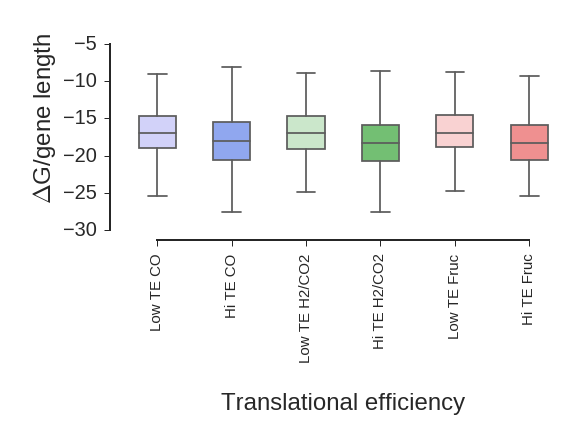

In [29]:

fig, ax=plt.subplots(figsize=(8,4))
sns.set(style="ticks")
palette=pastel=["#ccccff", "#809fff", "#c6ecc6", "#66cc66","#ffcccc","#ff8080"]
sns.boxplot(data=compair_sec_str,y='dG',x='kind',showfliers=False, width=0.5, ax =ax, palette=palette)
sns.despine(offset=10, trim=True)
ax.set_ylabel('\n'r'$\Delta$G/' 'gene length', fontsize=24)
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
#plt.title('High Fructose\n', fontsize=20)
ax.set_ylim(-30, 0)
ax.set_xlabel('\nTranslational efficiency', fontsize=24)
for label in ax.xaxis.get_ticklabels():
    label.set_rotation(90)
    label.set_fontsize(15)
for label in ax.yaxis.get_ticklabels():
    label.set_fontsize(20)
plt.savefig('/home/m/Dropbox/Clostridium_paper/figs/deltaG_with_TE.pdf', bbox_inches='tight')

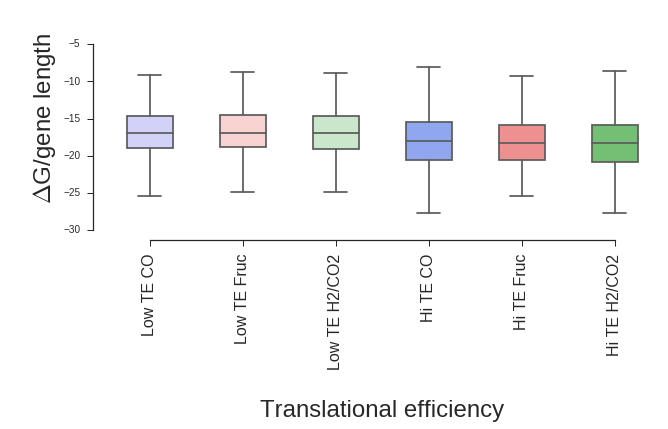

In [678]:
compair_sec_str = pd.concat([low_eff_dg_co, low_eff_dg_hf, low_eff_dg_h2c, hi_eff_dg_co, hi_eff_dg_hf, hi_eff_dg_h2c ])
plt.figure(figsize=(10,4))
sns.set(style="ticks")
palette=pastel=["#ccccff", "#ffcccc","#c6ecc6","#809fff" ,"#ff8080", "#66cc66"]
sns.boxplot(data=compair_sec_str,y='dG',x='kind',showfliers=False, width=0.5, palette=palette)
sns.despine(offset=10, trim=True)
plt.ylabel('\n'r'$\Delta$G/' 'gene length', fontsize=24)
#plt.title('High Fructose\n', fontsize=20)
plt.ylim(-30, 0)
plt.xlabel('\nTranslational efficiency', fontsize=24)
plt.xticks(rotation=90, fontsize=16, )
plt.savefig('/home/m/Dropbox/Clostridium_paper/figs/deltaG_with_TE.pdf', bbox_inches='tight')

In [407]:
import scipy as sp

In [430]:
len(low_eff_dg_h2c)

589

In [497]:
sp.stats.ttest_ind(low_eff_dg_co.dG,hi_eff_dg_co.dG,nan_policy='omit'), len(low_eff_dg_co)*2

(Ttest_indResult(statistic=6.3338811569931179, pvalue=3.328026013049689e-10),
 1252)

In [498]:
sp.stats.ttest_ind(low_eff_dg_hf.dG,hi_eff_dg_hf.dG, nan_policy='omit'), len(low_eff_dg_hf)*2

(Ttest_indResult(statistic=8.009398701657819, pvalue=2.7812026922813434e-15),
 1164)

In [499]:
sp.stats.ttest_ind(low_eff_dg_h2c.dG,hi_eff_dg_h2c.dG, nan_policy='omit'), len(low_eff_dg_h2c)*2

(Ttest_indResult(statistic=7.529453366503196, pvalue=1.0112204107283204e-13),
 1178)

## What's the GC content of High and Low TE genes?

# Functional enrichment of genes that have low or high mRNA structure
1. we show above that secondary structure is highly correlated with translational efficiency
2. we also showed that translationally efficient genes are enriched in housekeeping, metabolic and enery pathways
3. we wonder whether genes with high structure will functionally enrich in important pathways as well
4. If yes, we will measure the overlap (Venn diagram) between the two functional enrichments

In [21]:
kegg=pd.read_excel('/home/m/Dropbox/Clostridium_paper/Kegg/clju_path_annotation.xls')

In [22]:
dg_and_kegg=pd.merge(kegg, norm_secstr)

In [30]:
dg_hi_structure = dg_and_kegg[dg_and_kegg.dG<=np.percentile(dg_and_kegg.dG, 20)]
dg_lo_structure = dg_and_kegg[dg_and_kegg.dG>=np.percentile(dg_and_kegg.dG, 80)]

In [31]:
def prepare_df(df):
    df=df.reset_index()
    df=df.groupby(['subcategory'])['gene_id'].count()
    df=df.to_frame()
    df=df.reset_index()
    df=df.sort_values(by='gene_id', ascending=True)
    df=df[df.gene_id>1]
    df=df.set_index('subcategory')
    df=df.ix[-20:]
    return df

In [32]:
dg_hi_structure_map=prepare_df(dg_hi_structure)
dg_hi_structure_map=dg_hi_structure_map.reset_index()
dg_hi_structure_map.columns=dg_hi_structure_map.columns.str.replace('gene_id', 'Strong structure')
dg_hi_structure_map=dg_hi_structure_map.set_index('subcategory')

In [33]:
dg_lo_structure_map=prepare_df(dg_lo_structure)
dg_lo_structure_map=dg_lo_structure_map.reset_index()
dg_lo_structure_map.columns=dg_lo_structure_map.columns.str.replace('gene_id', 'Weak structure')
dg_lo_structure_map=dg_lo_structure_map.set_index('subcategory')

In [34]:
both=pd.concat([ dg_lo_structure_map,dg_hi_structure_map,], axis=1)

In [35]:
both=both.replace('NaN', 0)
both=both.sort_values(by='Weak structure')

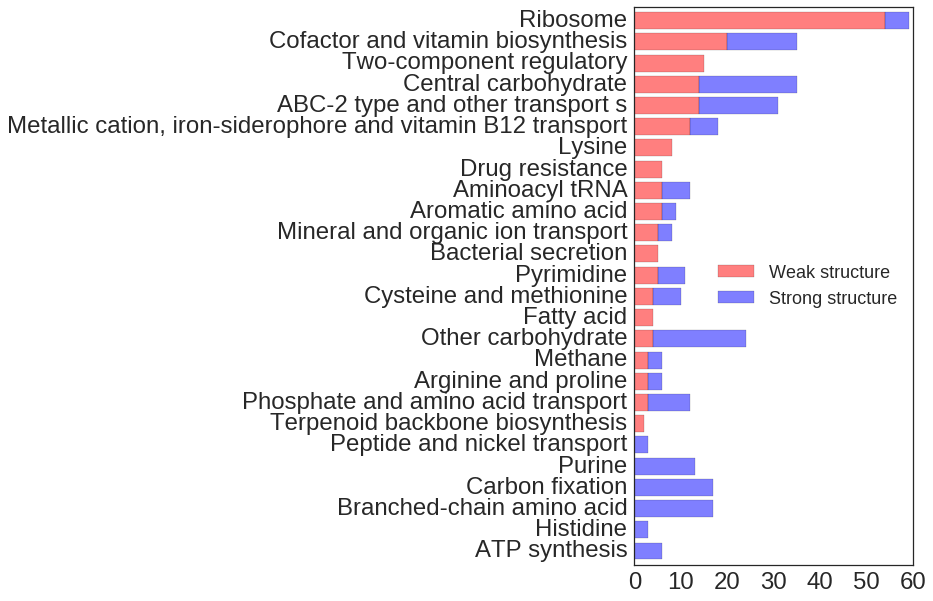

In [36]:
sns.set_style('white')
both.plot(kind='barh',stacked=True, fontsize=24,figsize=(5,10), legend=True, colors=['red', 'blue'], alpha=0.5, width=0.8)
plt.legend(fontsize=18, loc='best')
plt.savefig('/home/m/Dropbox/Clostridium_paper/figs/strong_and_weak_structures_aligned_to_kegg_20170214.pdf', bbox_inches='tight')

In [37]:
dg_hi_structure.to_excel('/home/m/Dropbox/Clostridium_paper/secondary_structure_genes/dg_hi_structure_map_80thpercentile.xls')
dg_lo_structure.to_excel('/home/m/Dropbox/Clostridium_paper/secondary_structure_genes/dg_lo_structure_map_20thpercentile.xls')

# Structural analysis of the 40 nt upstream of ATG and it's relation to translational efficiency

In [3]:
infile = SeqIO.read('/home/m/genome_files/REF-seq_CLJU.gbk','gb')
genes =[]
seq=[]
for feature in infile.features:
    if feature.type == 'CDS' or feature.type == 'rRNA' or feature.type == 'tRNA': 
        genes.append(feature.qualifiers['locus_tag'][0])
        if feature.strand == 1:
            start= (feature.location.start.real-40)
            stop =(feature.location.start.real)
            seq.append(str(infile.seq[start:stop]))
        elif feature.strand == -1:
            start =(feature.location.end.real)
            stop =(feature.location.end.real+40)
            seq.append(str(reverse_complement(infile.seq[start:stop])))
upstream_df = pd.DataFrame({"gene_id": genes, "seq":seq},
                          columns = ["gene_id",  "seq"])

In [6]:
co_lo_te_40_upstream=pd.merge(colowte,upstream_df)
co_hi_te_40_upstream=pd.merge(cohite, upstream_df)
hf_lo_te_40_upstream=pd.merge(hflowte,upstream_df)
hf_hi_te_40_upstream=pd.merge(hfhite, upstream_df)
h2c_lo_te_40_upstream=pd.merge(h2clowte, upstream_df)
h2c_hi_te_40_upstream=pd.merge(h2chite, upstream_df)

co_lo_te_40_upstream=co_lo_te_40_upstream[['gene_id', 'seq']]
co_hi_te_40_upstream=co_hi_te_40_upstream[['gene_id', 'seq']]
hf_lo_te_40_upstream=hf_lo_te_40_upstream[['gene_id', 'seq']]
hf_hi_te_40_upstream=hf_hi_te_40_upstream[['gene_id', 'seq']]
h2c_lo_te_40_upstream=h2c_lo_te_40_upstream[['gene_id', 'seq']]
h2c_hi_te_40_upstream=h2c_hi_te_40_upstream[['gene_id', 'seq']]

## writing 40 upstream seqs as fasta file

In [40]:
with open('/home/m/Dropbox/Clostridium_paper/co_lo_te_40_upstream.fasta', 'w') as outfile:
    for index, row in co_lo_te_40_upstream.iterrows():
        line = ('>%s\n%s\n' %(row[0],row[1]))
        outfile.write(line)
outfile.close()
with open('/home/m/Dropbox/Clostridium_paper/co_hi_te_40_upstream.fasta', 'w') as outfile:
    for index, row in co_hi_te_40_upstream.iterrows():
        line = ('>%s\n%s\n' %(row[0],row[1]))
        outfile.write(line)
outfile.close()
with open('/home/m/Dropbox/Clostridium_paper/hf_lo_te_40_upstream.fasta', 'w') as outfile:
    for index, row in hf_lo_te_40_upstream.iterrows():
        line = ('>%s\n%s\n' %(row[0],row[1]))
        outfile.write(line)
outfile.close()
with open('/home/m/Dropbox/Clostridium_paper/hf_hi_te_40_upstream.fasta', 'w') as outfile:
    for index, row in hf_hi_te_40_upstream.iterrows():
        line = ('>%s\n%s\n' %(row[0],row[1]))
        outfile.write(line)
outfile.close()
with open('/home/m/Dropbox/Clostridium_paper/h2c_lo_te_40_upstream.fasta', 'w') as outfile:
    for index, row in h2c_lo_te_40_upstream.iterrows():
        line = ('>%s\n%s\n' %(row[0],row[1]))
        outfile.write(line)
outfile.close()
with open('/home/m/Dropbox/Clostridium_paper/h2c_hi_te_40_upstream.fasta', 'w') as outfile:
    for index, row in h2c_hi_te_40_upstream.iterrows():
        line = ('>%s\n%s\n' %(row[0],row[1]))
        outfile.write(line)
outfile.close()

In [41]:
!cd /home/m/Dropbox/Clostridium_paper/

In [890]:
##co
!RNAfold -i co_lo_te_40_upstream.fasta --noPS -T 30 >co_lo_te_40_upstream.out
!perl /home/m/Dropbox/Clostridium_paper/secondary_structure_genes/filter.pl co_lo_te_40_upstream.out >co_lo_te_40_upstream_filtered.txt
co_lo_te_40_upstream_filtered=pd.read_csv('co_lo_te_40_upstream_filtered.txt', '\t', names=['gene_id', 'dG'])
!RNAfold -i co_hi_te_40_upstream.fasta --noPS -T 30 >co_hi_te_40_upstream.out
!perl /home/m/Dropbox/Clostridium_paper/secondary_structure_genes/filter.pl co_hi_te_40_upstream.out >co_hi_te_40_upstream_filtered.txt
co_hi_te_40_upstream_filtered=pd.read_csv('co_hi_te_40_upstream_filtered.txt', '\t', names=['gene_id', 'dG'])
##HF
!RNAfold -i hf_lo_te_40_upstream.fasta --noPS -T 30 >hf_lo_te_40_upstream.out
!perl /home/m/Dropbox/Clostridium_paper/secondary_structure_genes/filter.pl hf_lo_te_40_upstream.out >hf_lo_te_40_upstream_filtered.txt
hf_lo_te_40_upstream_filtered=pd.read_csv('hf_lo_te_40_upstream_filtered.txt', '\t', names=['gene_id', 'dG'])
!RNAfold -i hf_hi_te_40_upstream.fasta --noPS -T 30 >hf_hi_te_40_upstream.out
!perl /home/m/Dropbox/Clostridium_paper/secondary_structure_genes/filter.pl hf_hi_te_40_upstream.out >hf_hi_te_40_upstream_filtered.txt
hf_hi_te_40_upstream_filtered=pd.read_csv('hf_hi_te_40_upstream_filtered.txt', '\t', names=['gene_id', 'dG'])
##H2CO2
!RNAfold -i h2c_lo_te_40_upstream.fasta --noPS -T 30 >h2c_lo_te_40_upstream.out
!perl /home/m/Dropbox/Clostridium_paper/secondary_structure_genes/filter.pl h2c_lo_te_40_upstream.out >h2c_lo_te_40_upstream_filtered.txt
h2c_lo_te_40_upstream_filtered=pd.read_csv('h2c_lo_te_40_upstream_filtered.txt', '\t', names=['gene_id', 'dG'])
!RNAfold -i h2c_hi_te_40_upstream.fasta --noPS -T 30 >h2c_hi_te_40_upstream.out
!perl /home/m/Dropbox/Clostridium_paper/secondary_structure_genes/filter.pl h2c_hi_te_40_upstream.out >h2c_hi_te_40_upstream_filtered.txt
h2c_hi_te_40_upstream_filtered=pd.read_csv('h2c_hi_te_40_upstream_filtered.txt', '\t', names=['gene_id', 'dG'])

In [18]:
def GC(fasta):
    gc_genes=[]
    gene_id=[]
    for record in SeqIO.parse(fasta, "fasta"):
        A_count = record.seq.count('A')
        C_count = record.seq.count('C')
        G_count = record.seq.count('G')
        T_count = record.seq.count('T')
        length = len(record.seq)
        name = record.id
        cg_percentage = (float(C_count + G_count) /length)*100
        gc_genes.append(cg_percentage)
        gene_id.append(name)
    #final=sum(gc_genes)/len(gc_genes) *100
    df=pd.DataFrame({'gene_id':gene_id,'promoter_GC%':gc_genes}, columns=['gene_id','promoter_GC%'])
    return df

In [19]:
co_lo_te_gc_promoter=GC('co_lo_te_40_upstream.fasta')
co_hi_te_gc_promoter=GC('co_hi_te_40_upstream.fasta')
hf_lo_te_gc_promoter=GC('hf_lo_te_40_upstream.fasta')
hf_hi_te_gc_promoter=GC('hf_hi_te_40_upstream.fasta')
h2c_lo_te_gc_promoter=GC('h2c_lo_te_40_upstream.fasta')
h2c_hi_te_gc_promoter=GC('h2c_hi_te_40_upstream.fasta')

## getting GC values of Genes

In [20]:
co_lo_te_gene=pd.merge(colowte,gene_df) #gene_df is defined at the beginning
co_hi_te_gene=pd.merge(cohite, gene_df)
hf_lo_te_gene=pd.merge(hflowte,gene_df)
hf_hi_te_gene=pd.merge(hfhite, gene_df)
h2c_lo_te_gene=pd.merge(h2clowte,gene_df)
h2c_hi_te_gene=pd.merge(h2chite, gene_df)

co_lo_te_gene=co_lo_te_gene[['gene_id', 'cds_seq']]
co_hi_te_gene=co_hi_te_gene[['gene_id', 'cds_seq']]
hf_lo_te_gene=hf_lo_te_gene[['gene_id', 'cds_seq']]
hf_hi_te_gene=hf_hi_te_gene[['gene_id', 'cds_seq']]
h2c_lo_te_gene=h2c_lo_te_gene[['gene_id', 'cds_seq']]
h2c_hi_te_gene=h2c_hi_te_gene[['gene_id', 'cds_seq']]

## Writing fasta files for low and high TE genes

In [21]:
with open('/home/m/Dropbox/Clostridium_paper/co_lo_te_gene.fasta', 'w') as outfile:
    for index, row in co_lo_te_gene.iterrows():
        line = ('>%s\n%s\n' %(row[0],row[1]))
        outfile.write(line)
outfile.close()
with open('/home/m/Dropbox/Clostridium_paper/co_hi_te_gene.fasta', 'w') as outfile:
    for index, row in co_hi_te_gene.iterrows():
        line = ('>%s\n%s\n' %(row[0],row[1]))
        outfile.write(line)
outfile.close()
with open('/home/m/Dropbox/Clostridium_paper/hf_lo_te_gene.fasta', 'w') as outfile:
    for index, row in hf_lo_te_gene.iterrows():
        line = ('>%s\n%s\n' %(row[0],row[1]))
        outfile.write(line)
outfile.close()
with open('/home/m/Dropbox/Clostridium_paper/hf_hi_te_gene.fasta', 'w') as outfile:
    for index, row in hf_hi_te_gene.iterrows():
        line = ('>%s\n%s\n' %(row[0],row[1]))
        outfile.write(line)
outfile.close()
with open('/home/m/Dropbox/Clostridium_paper/h2c_lo_te_gene.fasta', 'w') as outfile:
    for index, row in h2c_lo_te_gene.iterrows():
        line = ('>%s\n%s\n' %(row[0],row[1]))
        outfile.write(line)
outfile.close()
with open('/home/m/Dropbox/Clostridium_paper/h2c_hi_te_gene.fasta', 'w') as outfile:
    for index, row in h2c_hi_te_gene.iterrows():
        line = ('>%s\n%s\n' %(row[0],row[1]))
        outfile.write(line)
outfile.close()

In [22]:
def GC2(fasta):
    gc_genes=[]
    gene_id=[]
    for record in SeqIO.parse(fasta, "fasta"):
        A_count = record.seq.count('A')
        C_count = record.seq.count('C')
        G_count = record.seq.count('G')
        T_count = record.seq.count('T')
        length = len(record.seq)
        name = record.id
        cg_percentage = (float(C_count + G_count) / length) *100
        gc_genes.append(cg_percentage)
        gene_id.append(name)
    #final=sum(gc_genes)/len(gc_genes) *100
    df=pd.DataFrame({'gene_id':gene_id,'gene_GC%':gc_genes}, columns=['gene_id','gene_GC%'])
    return df

In [23]:
co_lo_te_gc_gene=GC2('co_lo_te_gene.fasta')
co_hi_te_gc_gene=GC2('co_hi_te_gene.fasta')
hf_lo_te_gc_gene=GC2('hf_lo_te_gene.fasta')
hf_hi_te_gc_gene=GC2('hf_hi_te_gene.fasta')
h2c_lo_te_gc_gene=GC2('h2c_lo_te_gene.fasta')
h2c_hi_te_gc_gene=GC2('h2c_hi_te_gene.fasta')

### merging promoter and gene GC content from each group

In [24]:
co_lo_te_gc_gene_promoter=pd.merge(co_lo_te_gc_gene, co_lo_te_gc_promoter)
co_hi_te_gc_gene_promoter=pd.merge(co_hi_te_gc_gene, co_hi_te_gc_promoter)
hf_lo_te_gc_gene_promoter=pd.merge(hf_lo_te_gc_gene, hf_lo_te_gc_promoter)
hf_hi_te_gc_gene_promoter=pd.merge(hf_hi_te_gc_gene, hf_hi_te_gc_promoter)
h2c_lo_te_gc_gene_promoter=pd.merge(h2c_lo_te_gc_gene, h2c_lo_te_gc_promoter)
h2c_hi_te_gc_gene_promoter=pd.merge(h2c_hi_te_gc_gene, h2c_hi_te_gc_promoter)


In [30]:
cai = pd.read_excel('/home/m/Dropbox/Clostridium_paper/clju_cai.xls')

In [32]:
cai=cai[['gene_id','cai']]

In [34]:
co_lo_te_gc_gene_promoter=pd.merge(co_lo_te_gc_gene_promoter, cai)
co_hi_te_gc_gene_promoter=pd.merge(co_hi_te_gc_gene_promoter, cai)
hf_lo_te_gc_gene_promoter=pd.merge(hf_lo_te_gc_gene_promoter, cai)
hf_hi_te_gc_gene_promoter=pd.merge(hf_hi_te_gc_gene_promoter, cai)
h2c_lo_te_gc_gene_promoter=pd.merge(h2c_lo_te_gc_gene_promoter, cai)
h2c_hi_te_gc_gene_promoter=pd.merge(h2c_hi_te_gc_gene_promoter, cai)


In [25]:
from scipy import stats

In [58]:
co_gene=stats.mannwhitneyu(co_lo_te_gc_gene_promoter['gene_GC%'],co_hi_te_gc_gene_promoter['gene_GC%'])[1]

In [59]:
h2c_gene=stats.mannwhitneyu(h2c_lo_te_gc_gene_promoter['gene_GC%'],h2c_hi_te_gc_gene_promoter['gene_GC%'])[1]

In [60]:
hf_gene=stats.mannwhitneyu(hf_lo_te_gc_gene_promoter['gene_GC%'],hf_hi_te_gc_gene_promoter['gene_GC%'])[1]

In [61]:
co_cai=stats.mannwhitneyu(co_lo_te_gc_gene_promoter['cai'],co_hi_te_gc_gene_promoter['cai'])[1]

In [62]:
h2c_cai=stats.mannwhitneyu(h2c_lo_te_gc_gene_promoter['cai'],h2c_hi_te_gc_gene_promoter['cai'])[1]

In [63]:
hf_cai=stats.mannwhitneyu(hf_lo_te_gc_gene_promoter['cai'],hf_hi_te_gc_gene_promoter['cai'])[1]

In [86]:
co_gene,h2c_gene, hf_gene

(6.7260811718329178e-63, 2.2354367782617191e-63, 2.4848257941212005e-59)

In [87]:
co_cai , hf_cai , h2c_cai

(1.3304610690400226e-10, 3.8055215405606902e-14, 5.5579085092284524e-07)

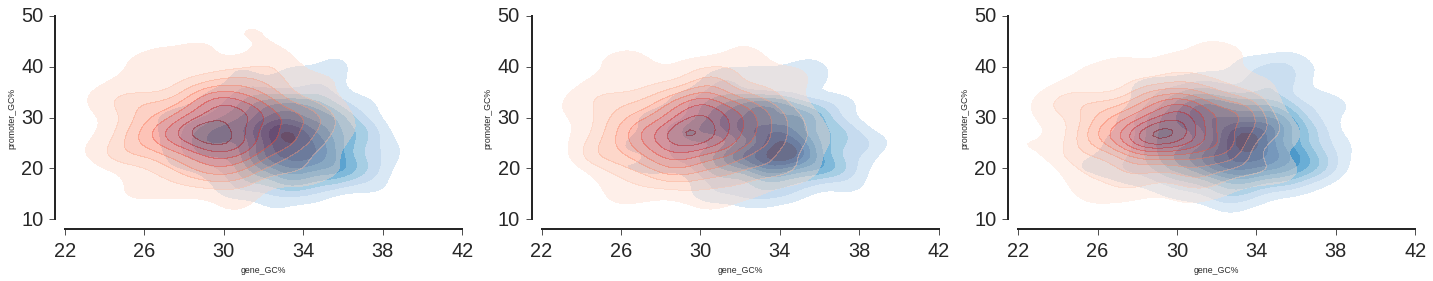

In [29]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, nrows=1,figsize=[20,4])

sns.kdeplot(co_hi_te_gc_gene_promoter['gene_GC%'], co_hi_te_gc_gene_promoter['promoter_GC%'],
                 cmap="Blues", shade=True, shade_lowest=False, alpha=1.0, ax=ax1)
sns.kdeplot(co_lo_te_gc_gene_promoter['gene_GC%'], co_lo_te_gc_gene_promoter['promoter_GC%'],
                 cmap="Reds", shade=True, shade_lowest=False, alpha=0.4,ax=ax1)
sns.kdeplot(h2c_hi_te_gc_gene_promoter['gene_GC%'], h2c_hi_te_gc_gene_promoter['promoter_GC%'],
                 cmap="Blues", shade=True, shade_lowest=False, alpha=1.0,ax=ax2)
sns.kdeplot(h2c_lo_te_gc_gene_promoter['gene_GC%'], h2c_lo_te_gc_gene_promoter['promoter_GC%'],
                 cmap="Reds", shade=True, shade_lowest=False, alpha=0.4,ax=ax2)

sns.kdeplot(hf_hi_te_gc_gene_promoter['gene_GC%'], hf_hi_te_gc_gene_promoter['promoter_GC%'],
                 cmap="Blues", shade=True, shade_lowest=False, alpha=1.0,ax=ax3)
ax3 = sns.kdeplot(hf_lo_te_gc_gene_promoter['gene_GC%'], hf_lo_te_gc_gene_promoter['promoter_GC%'],
                 cmap="Reds", shade=True, shade_lowest=False, alpha=0.4, ax=ax3)
sns.set_style('ticks')
sns.set_context("paper")
sns.despine (offset=10)

ax1.spines['left'].set_linewidth(2)
ax1.spines['bottom'].set_linewidth(2)
ax1.set_yticks([10,20,30,40,50])
ax1.set_xticks([22,26,30,34,38,42])
ax1.set_ylim(10,50)
ax1.set_xlim(22,42)
for label in ax1.xaxis.get_ticklabels():
    label.set_fontsize(20)
for label in ax1.yaxis.get_ticklabels():
    label.set_fontsize(20)
    
ax2.spines['left'].set_linewidth(2)
ax2.spines['bottom'].set_linewidth(2)
ax2.set_yticks([10,20,30,40,50])
ax2.set_xticks([22,26,30,34,38,42])
ax2.set_ylim(10,50)
ax2.set_xlim(22,42)
for label in ax2.xaxis.get_ticklabels():
    label.set_fontsize(20)
for label in ax2.yaxis.get_ticklabels():
    label.set_fontsize(20)

ax3.spines['left'].set_linewidth(2)
ax3.spines['bottom'].set_linewidth(2)
ax3.set_yticks([10,20,30,40,50])
ax3.set_xticks([22,26,30,34,38,42])
ax3.set_ylim(10,50)
ax3.set_xlim(22,42)
for label in ax3.xaxis.get_ticklabels():
    label.set_fontsize(20)
for label in ax3.yaxis.get_ticklabels():
    label.set_fontsize(20)

plt.tight_layout()
'''plt.xlim(22, 42)
plt.ylim(10, 50)
plt.legend(loc='best')
plt.xlabel('Gene GC%', fontsize=24)
plt.ylabel('promoter GC%', fontsize=24)'''

plt.savefig('/home/m/Dropbox/Clostridium_paper/figs/GC_content_promoter_gene_effect_on_TE_in_all_conditions.pdf', bbox_inches='tight')

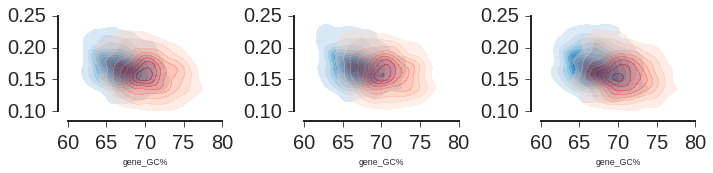

In [144]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, nrows=1,figsize=[10,2.5])

sns.kdeplot(100 - co_hi_te_gc_gene_promoter['gene_GC%'], co_hi_te_gc_gene_promoter['cai'],
                 cmap="Blues", shade=True, shade_lowest=False, alpha=1.0, ax=ax1)
sns.kdeplot(100 - co_lo_te_gc_gene_promoter['gene_GC%'], co_lo_te_gc_gene_promoter['cai'],
                 cmap="Reds", shade=True, shade_lowest=False, alpha=0.4,ax=ax1)
sns.kdeplot(100 - h2c_hi_te_gc_gene_promoter['gene_GC%'], h2c_hi_te_gc_gene_promoter['cai'],
                 cmap="Blues", shade=True, shade_lowest=False, alpha=1.0,ax=ax2)
sns.kdeplot(100 - h2c_lo_te_gc_gene_promoter['gene_GC%'], h2c_lo_te_gc_gene_promoter['cai'],
                 cmap="Reds", shade=True, shade_lowest=False, alpha=0.4,ax=ax2)

sns.kdeplot(100 - hf_hi_te_gc_gene_promoter['gene_GC%'], hf_hi_te_gc_gene_promoter['cai'],
                 cmap="Blues", shade=True, shade_lowest=False, alpha=1,ax=ax3)
sns.kdeplot(100 - hf_lo_te_gc_gene_promoter['gene_GC%'], hf_lo_te_gc_gene_promoter['cai'],
                 cmap="Reds", shade=True, shade_lowest=False, alpha=0.4, ax=ax3)
sns.set_style('ticks')
sns.set_context("paper")
sns.despine (offset=10)

ax1.spines['left'].set_linewidth(2)
ax1.spines['bottom'].set_linewidth(2)
ax1.set_yticks([0.1, 0.15,0.2, 0.25])
ax1.set_xticks([60,65,70,75,80])
ax1.set_ylim(0.1,0.25)
ax1.set_xlim(60,80)
ax1.set_ylabel('')
for label in ax1.xaxis.get_ticklabels():
    label.set_fontsize(20)
for label in ax1.yaxis.get_ticklabels():
    label.set_fontsize(20)
    
ax2.spines['left'].set_linewidth(2)
ax2.spines['bottom'].set_linewidth(2)
ax2.set_yticks([0.1, 0.15,0.2, 0.25])
ax2.set_xticks([60,65,70,75,80])
ax2.set_ylim(0.1,0.25)
ax2.set_xlim(60,80)
ax2.set_ylabel('')
for label in ax2.xaxis.get_ticklabels():
    label.set_fontsize(20)
for label in ax2.yaxis.get_ticklabels():
    label.set_fontsize(20)

ax3.spines['left'].set_linewidth(2)
ax3.spines['bottom'].set_linewidth(2)
ax3.set_yticks([0.1,0.15, 0.2, 0.25])
ax3.set_xticks([60,65,70,75,80])
ax3.set_ylim(0.1,0.25)
ax3.set_xlim(60,80)
ax3.set_ylabel('')
for label in ax3.xaxis.get_ticklabels():
    label.set_fontsize(20)
for label in ax3.yaxis.get_ticklabels():
    label.set_fontsize(20)

plt.tight_layout()


plt.savefig('/home/m/Dropbox/Clostridium_paper/figs/GC_content_gene_and_CAI_effect_on_TE_in_all_conditions.pdf', bbox_inches='tight')

## Understanding the codon usage in high and low translational efficiency genes
This will be based on the codon adaptation index CAI described by Sharp and Li (Nucleic Acids Res. 1987 Feb 11;15(3):1281-95)

In [71]:
co_lo_te_40_upstream_filtered=co_lo_te_40_upstream_filtered[co_lo_te_40_upstream_filtered.dG<0]
co_lo_te_40_upstream_filtered['kind']='Low TE CO'
#co_lo_te_40_upstream_filtered.columns=co_lo_te_40_upstream_filtered.columns.str.replace('dG', 'CO low')
co_hi_te_40_upstream_filtered=co_hi_te_40_upstream_filtered[co_hi_te_40_upstream_filtered.dG<0]
co_hi_te_40_upstream_filtered['kind']='Hi TE CO'
#co_hi_te_40_upstream_filtered.columns=co_hi_te_40_upstream_filtered.columns.str.replace('dG', 'CO hi')
hf_lo_te_40_upstream_filtered=hf_lo_te_40_upstream_filtered[hf_lo_te_40_upstream_filtered.dG<0]
hf_lo_te_40_upstream_filtered['kind']='Low TE HF'
#hf_lo_te_40_upstream_filtered.columns=hf_lo_te_40_upstream_filtered.columns.str.replace('dG', 'Fruc low')
hf_hi_te_40_upstream_filtered=hf_hi_te_40_upstream_filtered[hf_hi_te_40_upstream_filtered.dG<0]
hf_hi_te_40_upstream_filtered['kind']='Hi TE HF'
#hf_hi_te_40_upstream_filtered.columns=hf_hi_te_40_upstream_filtered.columns.str.replace('dG', 'Fruc hi')
h2c_lo_te_40_upstream_filtered=h2c_lo_te_40_upstream_filtered[h2c_lo_te_40_upstream_filtered.dG<0]
h2c_lo_te_40_upstream_filtered['kind']='Low TE H2CO2'
#h2c_lo_te_40_upstream_filtered.columns=h2c_lo_te_40_upstream_filtered.columns.str.replace('dG', 'H2C low')
h2c_hi_te_40_upstream_filtered=h2c_hi_te_40_upstream_filtered[h2c_hi_te_40_upstream_filtered.dG<0]
h2c_hi_te_40_upstream_filtered['kind']='Hi TE H2CO2'
#h2c_hi_te_40_upstream_filtered.columns=h2c_hi_te_40_upstream_filtered.columns.str.replace('dG', 'H2C hi')

NameError: name 'co_lo_te_40_upstream_filtered' is not defined

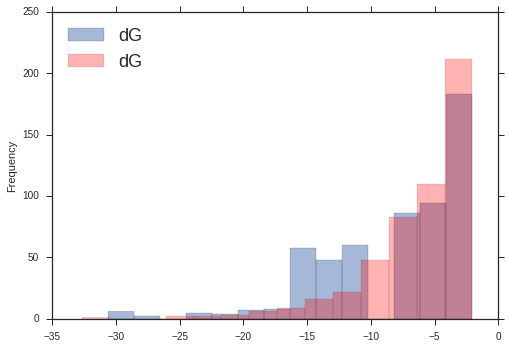

In [903]:
fig, ax = plt.subplots()
co_lo_te_40_upstream_filtered.plot(kind='hist', bins=14, alpha=0.5, ax=ax)
co_hi_te_40_upstream_filtered.plot(kind='hist', bins=14, alpha=0.3, color='red', ax=ax)
plt.legend(loc='best', fontsize=18,)

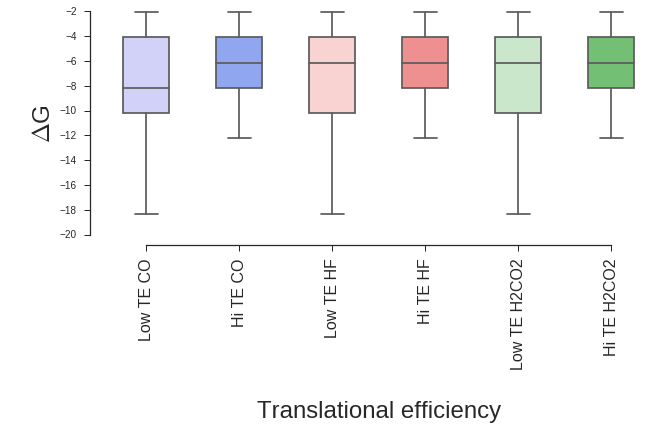

In [906]:
compair_sec_str_40_upstream_atg = pd.concat([co_lo_te_40_upstream_filtered, co_hi_te_40_upstream_filtered, \
                                             hf_lo_te_40_upstream_filtered, hf_hi_te_40_upstream_filtered\
                                             , h2c_lo_te_40_upstream_filtered, h2c_hi_te_40_upstream_filtered ])
plt.figure(figsize=(10,4))
sns.set(style="ticks")
palette=pastel=["#ccccff", "#809fff", "#ffcccc","#ff8080", "#c6ecc6", "#66cc66"]
sns.boxplot(data=compair_sec_str_40_upstream_atg,y='dG',x='kind',showfliers=False, width=0.5, palette=palette)
sns.despine(offset=10, trim=True)
plt.ylabel('\n'r'$\Delta$G', fontsize=24)
#plt.title('High Fructose\n', fontsize=20)
plt.xlabel('\nTranslational efficiency', fontsize=24)
plt.xticks(rotation=90, fontsize=16, )
plt.savefig('/home/m/Dropbox/Clostridium_paper/figs/deltaG_with_TE.pdf', bbox_inches='tight')

In [863]:
co_hi_te_40_upstream_filtered.to_excel('/home/m/Desktop/test1.xls')

In [814]:
dg_40_upstream_merged_co.head()

,gene_id,CO low,gene_id,CO hi
0,CLJU_RS19950,-24.489796,CLJU_RS11870,-4.081633
1,CLJU_RS00690,-6.122449,CLJU_RS18625,-2.040816
2,CLJU_RS11230,-10.204082,CLJU_RS05960,-2.040816
3,CLJU_RS03515,-12.244898,CLJU_RS10835,-4.081633
4,CLJU_RS21460,-14.285714,CLJU_RS20045,NaN


In [765]:
!head /home/m/Dropbox/Clostridium_paper/40_bp_upstream_of_ATG.fasta

>CLJU_RS00005
ATATGTTGTGAATTATTTTTCTAAGACTGGAGGATACAAA
>CLJU_RS00010
CTATATACCTTTCTACATTGTGAATAAAGGAGGACATTAA
>CLJU_RS00015
CTTAAACAATTAAAAATAAAAAAATTGGAGATAATAGAAA
>CLJU_RS00020
CATTATATATTGTGATATAATTATAAATAGGTGTTTTTAT
>CLJU_RS00025
TGGAAAGATGAATAGAATTTAATTTTGAAAGGAGATTGTT


In [1]:
import sys
sys.path.append('/home/m/python_funcs/')
import functions
functions.get_full_info_df()